In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Constants
N = 5  # Number of meshes
dx = 4  # Mesh size (cm)
L = 20  # Total thicknes (cm)
D = 1.1552  # Diffusion coefficient (cm)

# Cross-sections
sig_a = 0.81362  # (1/cm)
nu_sig_f = 0.80684  # (1/cm)

In [ ]:
# Case of Vacuum Boundary Condition
# Matrix coefficients M
a = (6*D)/(dx**2)
b = (-16*(D**2))/((dx**2)*(dx+4*D))
c = (-2*D)/(dx**2)

a1 = a + b + sig_a
b1 = a/(-6)
b2 = a/3 + sig_a
b3 = c/2

f = nu_sig_f

# Define matrix M and matrix F
M = np.array([
    [a1, c, 0, 0, 0],
    [b1, b2, b3, 0, 0],
    [0, b1, b2, b3, 0],
    [0, 0, b1, b2, b3],
    [0, 0, 0, c, a1]
])

F = np.array([
    [f, 0, 0, 0, 0],
    [0, f, 0, 0, 0],
    [0, 0, f, 0, 0],
    [0, 0, 0, f, 0],
    [0, 0, 0, 0, f]
])

print(M, F)

[[ 1.09202148 -0.1444      0.          0.          0.        ]
 [-0.0722      0.95802    -0.0722      0.          0.        ]
 [ 0.         -0.0722      0.95802    -0.0722      0.        ]
 [ 0.          0.         -0.0722      0.95802    -0.0722    ]
 [ 0.          0.          0.         -0.1444      1.09202148]] [[0.80684 0.      0.      0.      0.     ]
 [0.      0.80684 0.      0.      0.     ]
 [0.      0.      0.80684 0.      0.     ]
 [0.      0.      0.      0.80684 0.     ]
 [0.      0.      0.      0.      0.80684]]


In [ ]:
# Calculate the inverse of matrix M
M_inv = np.linalg.inv(M)

# Multiply F with the inverse of M
A = F @ M_inv

A

array([[7.46330209e-01, 1.13138820e-01, 8.57576619e-03, 6.52807628e-04,
        4.31609738e-05],
       [5.65694101e-02, 8.55609573e-01, 6.48540230e-02, 4.93684179e-03,
        3.26403814e-04],
       [4.28788310e-03, 6.48540230e-02, 8.51970649e-01, 6.48540230e-02,
        4.28788310e-03],
       [3.26403814e-04, 4.93684179e-03, 6.48540230e-02, 8.55609573e-01,
        5.65694101e-02],
       [4.31609738e-05, 6.52807628e-04, 8.57576619e-03, 1.13138820e-01,
        7.46330209e-01]])

In [ ]:
# Initial guess for eigenvector
Phi = np.ones(N)

In [ ]:
# Power Iteration Method
tolerance = 1e-4  # Convergence tolerance
max_iterations = 1000  # Maximum number of iterations

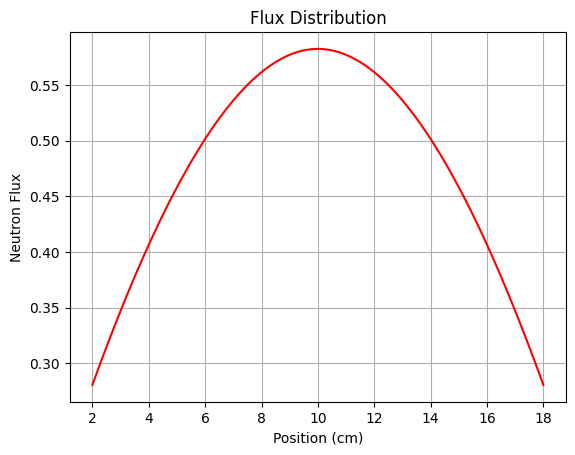

Multiplication factor (k): 0.9675828217237264
Flux: [0.28058198 0.50160774 0.58251769 0.50160774 0.28058198]
Number of iterations: 32


In [ ]:
# Power Iteration loop
iteration = 0
tolerance = 1e-4
diff = 1.0
while diff > tolerance and iteration < max_iterations:
    # Store previous eigenvector
    prev_Phi = Phi.copy()

    # Calculate new eigenvector
    Phi = A.dot(Phi)

    # Update eigenvalue estimate
    k = Phi[0] / prev_Phi[0]

    # Normalize eigenvector
    Phi /= np.linalg.norm(Phi)

    # Calculate difference
    diff = np.linalg.norm(Phi - prev_Phi)

    iteration += 1

# Spline interpolation for the flux distribution
x = np.linspace(dx / 2, L - dx / 2, N)  # Original mesh positions
y = Phi  # Flux values at the mesh positions
spline1 = CubicSpline(x, y)

# Higher number of points for a smoother curve
x_interp = np.linspace(dx / 2, L - dx / 2, 100)
y_interp = spline1(x_interp)

# Plot the flux distribution
plt.plot(x_interp, y_interp, '-r')  # Smooth curve
plt.xlabel('Position (cm)')
plt.ylabel('Neutron Flux')
plt.title('Flux Distribution')
plt.grid(True)
plt.show()

# Print results
print(f'Multiplication factor (k): {k}')
print(f'Flux: {Phi}')
print(f'Number of iterations: {iteration}')

In [ ]:
# Case of Zero Flux Boundary Condition
#
# Constants
N = 5  # Number of meshes
dx = 4  # Mesh size (cm)
L = 20  # Total thicknes (cm)
D = 1.1552  # Diffusion coefficient (cm)

# Cross-sections
sig_a = 0.81362  # (1/cm)
nu_sig_f = 0.80684  # (1/cm)

# Matrix coefficients
a = (6*D)/(dx**2)
b = (-16*(D**2))/((dx**2)*(dx+4*D))
c = (-2*D)/(dx**2)

a1b = a + sig_a
b1b = c/2
b2b = c/(-1) + sig_a

# Define matrices M2 and F2


M2 = np.array([
    [a1b, c, 0, 0, 0],
    [b1b, b2b, b1b, 0, 0],
    [0, b1b, b2b, b1b, 0],
    [0, 0, b1b, b2b, b1b],
    [0, 0, 0, c, a1b]
])

F2 = F

In [ ]:
# Calculate the inverse of matrix M2
M2_inv = np.linalg.inv(M2)

# Multiply F with the inverse of M2
A2 = F @ M2_inv

A2

array([[6.52849223e-01, 9.89677048e-02, 7.50156121e-03, 5.70323858e-04,
        3.30259240e-05],
       [4.94838524e-02, 8.54535413e-01, 6.47721367e-02, 4.92445424e-03,
        2.85161929e-04],
       [3.75078060e-03, 6.47721367e-02, 8.51958306e-01, 6.47721367e-02,
        3.75078060e-03],
       [2.85161929e-04, 4.92445424e-03, 6.47721367e-02, 8.54535413e-01,
        4.94838524e-02],
       [3.30259240e-05, 5.70323858e-04, 7.50156121e-03, 9.89677048e-02,
        6.52849223e-01]])

In [ ]:
# Initial guess for eigenvector
Phi2 = np.ones(N)

In [ ]:
# Power Iteration Method
tolerance = 1e-4  # Convergence tolerance
max_iterations = 1000  # Maximum number of iterations

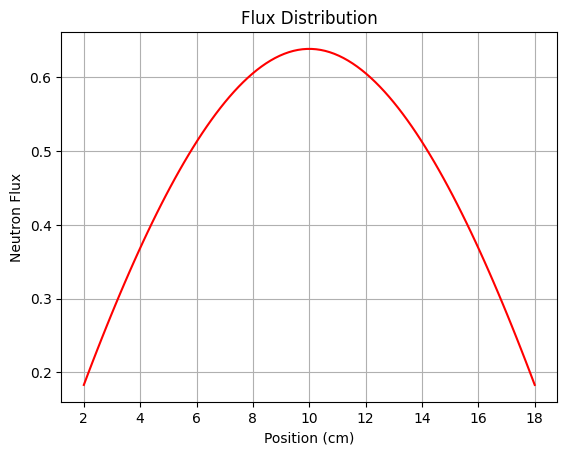

Multiplication factor (k): 0.9578600066204446
Flux: [0.18295371 0.51247814 0.63858296 0.51247814 0.18295371]
Number of iterations: 30


In [ ]:
# Power Iteration loop
iteration = 0
tolerance = 1e-4
diff = 1.0
while diff > tolerance and iteration < max_iterations:
    # Store previous eigenvector
    prev_Phi2 = Phi2.copy()

    # Calculate new eigenvector
    Phi2 = A2.dot(Phi2)

    # Update eigenvalue estimate
    k2 = Phi2[0] / prev_Phi2[0]

    # Normalize eigenvector
    Phi2 /= np.linalg.norm(Phi2)

    # Calculate difference
    diff = np.linalg.norm(Phi2 - prev_Phi2)

    iteration += 1

# Spline interpolation for the flux distribution
x2 = np.linspace(dx / 2, L - dx / 2, N)  # Original mesh positions
y2 = Phi2  # Flux values at the mesh positions
spline2 = CubicSpline(x2, y2)

# Higher number of points for a smoother curve
x2_interp = np.linspace(dx / 2, L - dx / 2, 100)
y2_interp = spline2(x2_interp)

# Plot the flux distribution
plt.plot(x2_interp, y2_interp, '-r')  # Smooth curve
plt.xlabel('Position (cm)')
plt.ylabel('Neutron Flux')
plt.title('Flux Distribution')
plt.grid(True)
plt.show()

# Print results
print(f'Multiplication factor (k): {k2}')
print(f'Flux: {Phi2}')
print(f'Number of iterations: {iteration}')

<ipython-input-16-1172403cd757>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x2_interp, y2_interp, '-r', color='b', label='Zero Flux BC')  # Smooth curve


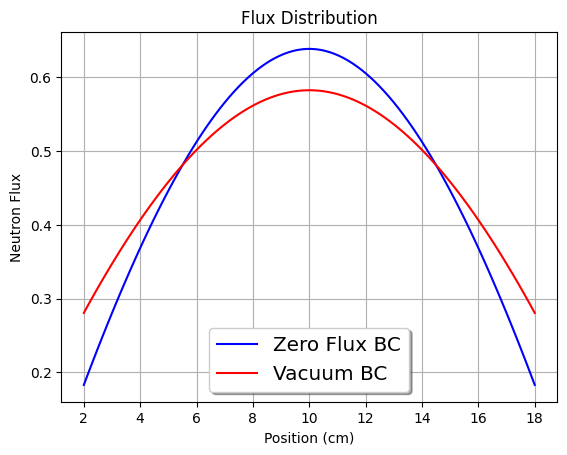

In [ ]:
# Plot the flux distribution
# fig, ax = plt.subplots(figsize=(11,6))
plt.plot(x2_interp, y2_interp, '-r', color='b', label='Zero Flux BC')  # Smooth curve
plt.plot(x_interp, y_interp, '-r', label='Vacuum BC')
plt.xlabel('Position (cm)')
plt.ylabel('Neutron Flux')
plt.title('Flux Distribution')
# Show legend
plt.legend(loc='lower center', shadow=True, fontsize='x-large')

plt.grid(True)
plt.show()